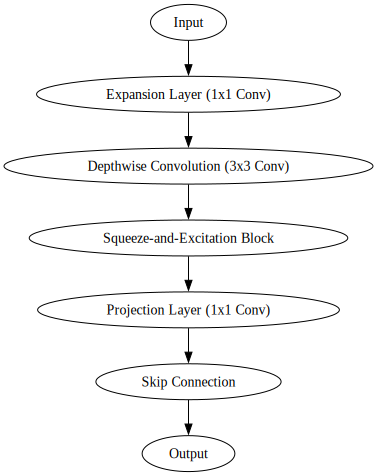

In [1]:
from graphviz import Digraph, Source

dot = Digraph(comment='MBConv Block')


# Define the nodes
dot.node('A', 'Input')
dot.node('B', 'Expansion Layer (1x1 Conv)')
dot.node('C', 'Depthwise Convolution (3x3 Conv)')
dot.node('D', 'Squeeze-and-Excitation Block')
dot.node('E', 'Projection Layer (1x1 Conv)')
dot.node('F', 'Skip Connection')
dot.node('G', 'Output')

# Define the edges
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG'])

# Render the diagram inline in the notebook
display(Source(dot.source))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import layers, models

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nooni/2863.jpg
/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nooni/187.jpg
/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nooni/2844.jpg
/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nooni/708.jpg
/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nooni/2866.jpg
/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nooni/185.jpg
/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nooni/703.jpg
/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nooni/2852.jpg
/kaggle/inpu

In [3]:
path = '/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset'
no_epochs = 500

In [4]:
labels = []
for lab in tqdm(os.listdir(path)):
    labels.append(lab)
print(f'No of lables found = {len(labels)}')
no_classes = len(labels)


100%|██████████| 40/40 [00:00<00:00, 314180.07it/s]

No of lables found = 40


In [5]:
print(labels)

['Nooni', 'Nithyapushpa', 'Basale', 'Pomegranate', 'Honge', 'Lemon_grass', 'Mint', 'Betel_Nut', 'Nagadali', 'Curry_Leaf', 'Jasmine', 'Castor', 'Sapota', 'Neem', 'Ashoka', 'Brahmi', 'Amruta_Balli', 'Pappaya', 'Pepper', 'Wood_sorel', 'Gauva', 'Hibiscus', 'Ashwagandha', 'Aloevera', 'Raktachandini', 'Insulin', 'Bamboo', 'Amla', 'Arali', 'Geranium', 'Avacado', 'Lemon', 'Ekka', 'Betel', 'Henna', 'Doddapatre', 'Rose', 'Mango', 'Tulasi', 'Ganike']


In [6]:
X_train = []
y_train = []
img_per_lab = []

#use the following
#227 - for alexnet
#224 - for the rest
image_size = 224 

# Define the device
device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"
print(device)

# Example of running operations on the specified device
for i in labels:
    folderPath = path + '/' + i#os.path.join(path,i)
    print(f'{labels.index(i)}: {folderPath}')
    imglist = os.listdir(folderPath)
    img_per_lab.append(len(imglist))
    for j in tqdm(imglist):
        img = cv2.imread(folderPath + '/' + j)#os.path.join(folderPath,j))
        #print(folderPath + '\\' + j)
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

/GPU:0
0: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nooni


100%|██████████| 146/146 [00:01<00:00, 95.90it/s]


1: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nithyapushpa


100%|██████████| 146/146 [00:01<00:00, 93.72it/s]


2: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Basale


100%|██████████| 146/146 [00:01<00:00, 103.06it/s]


3: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Pomegranate


100%|██████████| 146/146 [00:01<00:00, 105.82it/s]


4: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Honge


100%|██████████| 146/146 [00:01<00:00, 108.09it/s]


5: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Lemon_grass


100%|██████████| 146/146 [00:01<00:00, 101.86it/s]


6: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Mint


100%|██████████| 153/153 [00:01<00:00, 100.48it/s]


7: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Betel_Nut


100%|██████████| 146/146 [00:01<00:00, 111.14it/s]


8: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Nagadali


100%|██████████| 152/152 [00:01<00:00, 111.30it/s]


9: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Curry_Leaf


100%|██████████| 146/146 [00:01<00:00, 107.28it/s]


10: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Jasmine


100%|██████████| 187/187 [00:01<00:00, 104.67it/s]


11: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Castor


100%|██████████| 160/160 [00:01<00:00, 100.81it/s]


12: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Sapota


100%|██████████| 146/146 [00:01<00:00, 104.64it/s]


13: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Neem


100%|██████████| 146/146 [00:01<00:00, 105.81it/s]


14: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Ashoka


100%|██████████| 146/146 [00:01<00:00, 100.88it/s]


15: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Brahmi


100%|██████████| 146/146 [00:01<00:00, 104.65it/s]


16: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Amruta_Balli


100%|██████████| 146/146 [00:01<00:00, 105.34it/s]


17: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Pappaya


100%|██████████| 146/146 [00:01<00:00, 102.65it/s]


18: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Pepper


100%|██████████| 146/146 [00:01<00:00, 96.40it/s]


19: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Wood_sorel


100%|██████████| 146/146 [00:01<00:00, 94.74it/s]


20: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Gauva


100%|██████████| 146/146 [00:01<00:00, 107.28it/s]


21: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Hibiscus


100%|██████████| 165/165 [00:01<00:00, 99.85it/s]


22: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Ashwagandha


100%|██████████| 146/146 [00:01<00:00, 101.15it/s]


23: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Aloevera


100%|██████████| 164/164 [00:01<00:00, 98.24it/s]


24: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Raktachandini


100%|██████████| 146/146 [00:01<00:00, 96.40it/s]


25: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Insulin


100%|██████████| 146/146 [00:01<00:00, 102.16it/s]


26: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Bamboo


100%|██████████| 146/146 [00:01<00:00, 112.90it/s]


27: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Amla


100%|██████████| 146/146 [00:01<00:00, 109.53it/s]


28: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Arali


100%|██████████| 146/146 [00:01<00:00, 106.17it/s]


29: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Geranium


100%|██████████| 146/146 [00:01<00:00, 105.23it/s]


30: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado


100%|██████████| 146/146 [00:01<00:00, 109.77it/s]


31: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Lemon


100%|██████████| 146/146 [00:01<00:00, 104.00it/s]


32: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Ekka


100%|██████████| 146/146 [00:01<00:00, 112.27it/s]


33: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Betel


100%|██████████| 151/151 [00:01<00:00, 106.50it/s]


34: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Henna


100%|██████████| 150/150 [00:01<00:00, 101.95it/s]


35: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Doddapatre


100%|██████████| 146/146 [00:01<00:00, 97.33it/s]


36: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Rose


100%|██████████| 168/168 [00:01<00:00, 104.09it/s]


37: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Mango


100%|██████████| 146/146 [00:01<00:00, 97.68it/s]


38: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Tulasi


100%|██████████| 146/146 [00:01<00:00, 101.35it/s]


39: /kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Ganike


100%|██████████| 115/115 [00:01<00:00, 104.90it/s]


In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [8]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [9]:
X_train.shape

(5945, 224, 224, 3)

In [10]:
X_train,X_Val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [12]:
y_train_new = []
count = 0
for i in y_train:
    y_train_new.append(labels.index(i))
    
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_val:
    y_test_new.append(labels.index(i))
y_val = y_test_new
y_val = tf.keras.utils.to_categorical(y_val)

In [13]:
class CategoricalFbeta(tf.keras.callbacks.Callback):
    def __init__(self, beta=1, num_classes=None):
        super(CategoricalFbeta, self).__init__()
        self.beta = beta
        self.num_classes = num_classes
    
    def on_epoch_end(self, epoch, logs=None):
        print(logs)

# Create an instance of the custom callback
cat_fbeta_callback = CategoricalFbeta(beta=1)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
inception_base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in inception_base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = inception_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(labels), activation='sigmoid')(x)  # Use 'softmax' for multi-class

# Create the final model
inception_model = Model(inputs=inception_base_model.input, outputs=output_layer)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [15]:
inception_model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall(),
                           tf.keras.metrics.AUC(),
                           tf.keras.metrics.AUC(curve="PR"),
                           tf.keras.metrics.TruePositives(),
                           tf.keras.metrics.TrueNegatives(),
                           tf.keras.metrics.FalsePositives(),
                           tf.keras.metrics.FalseNegatives()
                          ])

In [16]:
inception_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 23,941,960 (91.33 MB)

 Trainable params: 2,139,176 (8.16 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [17]:
inception_history = inception_model.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=no_epochs,
    verbose=1,
    batch_size=30,
    callbacks=[cat_fbeta_callback]
)

Epoch 1/500


I0000 00:00:1724754707.099584      70 service.cc:145] XLA service 0x7b488c003cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724754707.099644      70 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  4/102 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.0632 - auc: 0.5091 - auc_1: 0.0258 - false_negatives: 35.0000 - false_positives: 1544.7500 - loss: 58.2691 - precision: 0.0258 - recall: 0.5465 - true_negatives: 1380.2500 - true_positives: 40.0000

I0000 00:00:1724754716.728018      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.0368 - auc: 0.5347 - auc_1: 0.0277 - false_negatives: 624.4510 - false_positives: 32059.6758 - loss: 30.2233 - precision: 0.0276 - recall: 0.5950 - true_negatives: 28188.8242 - true_positives: 920.3823{'accuracy': 0.03581991419196129, 'auc': 0.5378729104995728, 'auc_1': 0.027974940836429596, 'false_negatives': 1286.0, 'false_positives': 61765.0, 'loss': 13.649541854858398, 'precision': 0.027659708634018898, 'recall': 0.577390730381012, 'true_negatives': 56912.0, 'true_positives': 1757.0, 'val_accuracy': 0.07095926254987717, 'val_auc': 0.5810471773147583, 'val_auc_1': 0.036440227180719376, 'val_false_negatives': 293.0, 'val_false_positives': 15508.0, 'val_loss': 3.631866455078125, 'val_precision': 0.02929394133388996, 'val_recall': 0.6149802803993225, 'val_true_negatives': 14171.0, 'val_true_positives': 468.0}
102/102 ━━━━━━━━━━━━━━━━━━━━ 44s 257ms/step - accuracy: 0.0368 - auc: 0.5347 - auc_1: 0.0277 - false_negatives: 630.8738 -

In [18]:
inception_model.save("InceptionModel.h5")
inception_history.history.keys()

dict_keys(['accuracy', 'auc', 'auc_1', 'false_negatives', 'false_positives', 'loss', 'precision', 'recall', 'true_negatives', 'true_positives', 'val_accuracy', 'val_auc', 'val_auc_1', 'val_false_negatives', 'val_false_positives', 'val_loss', 'val_precision', 'val_recall', 'val_true_negatives', 'val_true_positives'])

In [19]:
train_precision = inception_history.history['precision']
print(len(train_precision))

val_precision = inception_history.history['val_precision']
print(len(val_precision))

train_recall = inception_history.history['recall']
print(len(train_recall))

val_recall = inception_history.history['val_recall']
print(len(val_recall))

500
500
500
500


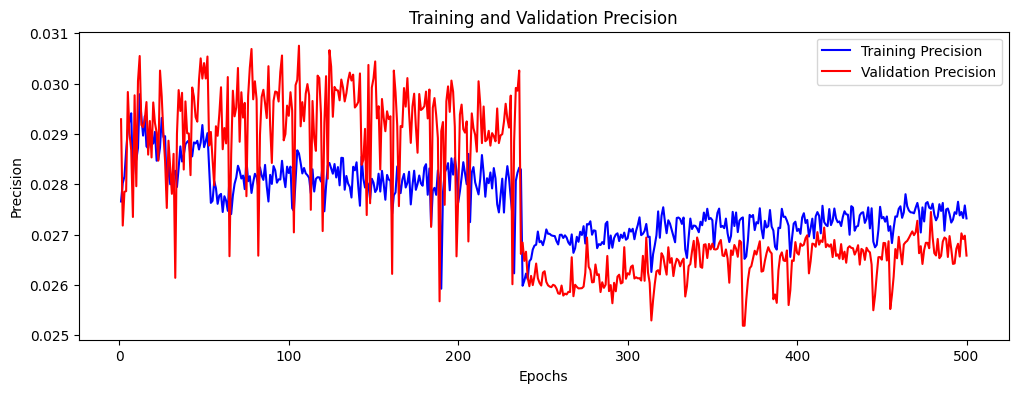

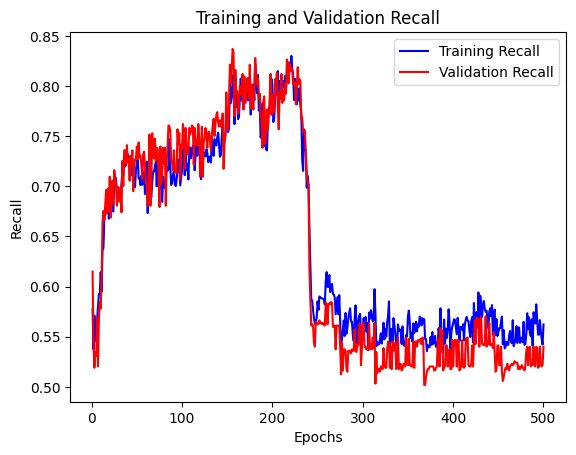

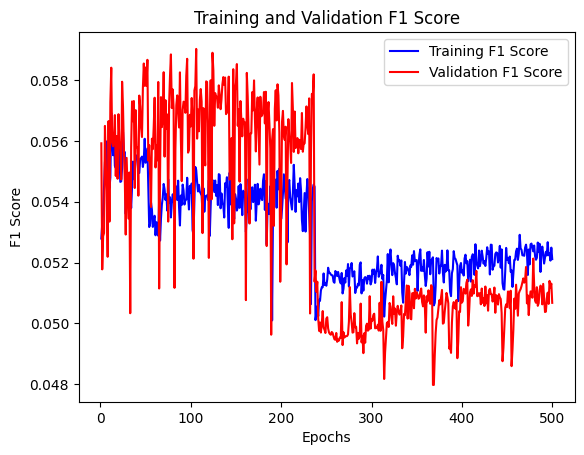

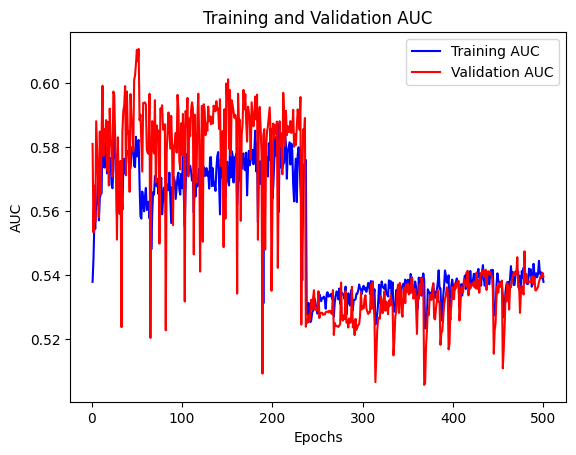

In [20]:
# Calculate F1 score
train_f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(train_precision, train_recall)]
val_f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(val_precision, val_recall)]

# Adjust key names as necessary
train_auc = inception_history.history.get('auc')
val_auc = inception_history.history.get('val_auc')

epochs = range(1, no_epochs+1)

# Plot precision
plt.figure(figsize=(12, 4))
plt.plot(epochs, train_precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot Recall
plt.plot(epochs, train_recall, 'b', label='Training Recall')
plt.plot(epochs, val_recall, 'r', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Plot F1 score
plt.plot(epochs, train_f1, 'b', label='Training F1 Score')
plt.plot(epochs, val_f1, 'r', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# Plot AUC (if available)
if train_auc and val_auc:
    plt.plot(epochs, train_auc, 'b', label='Training AUC')
    plt.plot(epochs, val_auc, 'r', label='Validation AUC')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.show()